In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('/Users/bbkar/Documents/Portfolio Project 2- Mall Customers/Mall_Customers.csv')
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


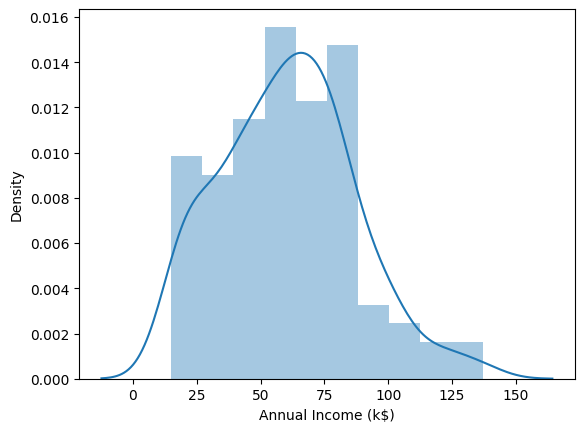

In [5]:
sb.distplot(df['Annual Income (k$)']);

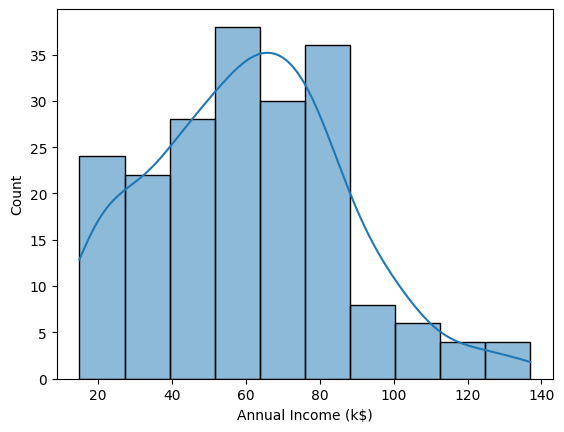

In [6]:
sb.histplot(df['Annual Income (k$)'], kde=True); #Kernel density estimate 

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

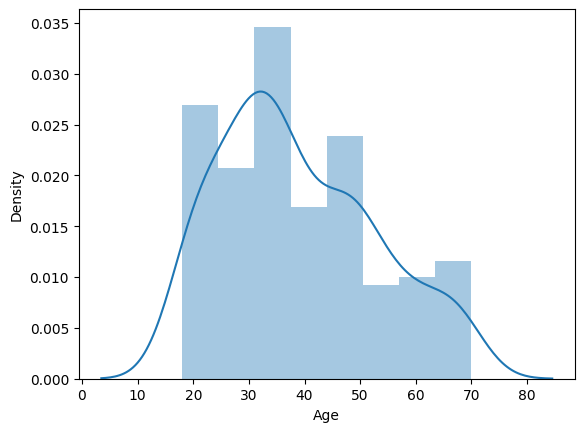

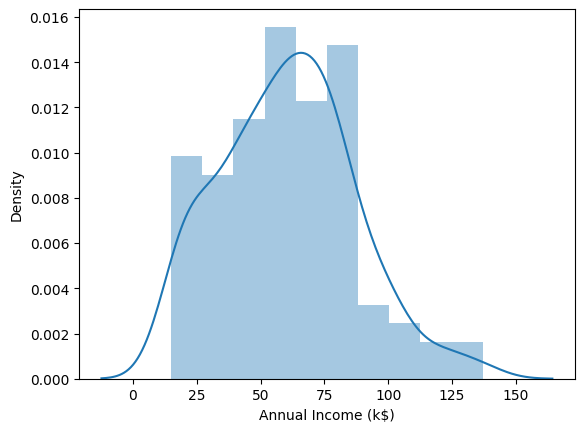

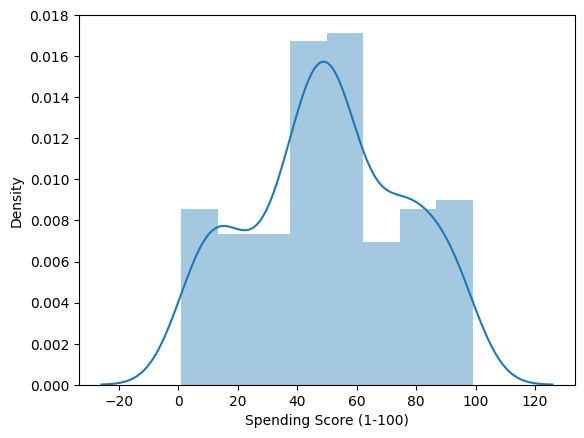

In [8]:
cols = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in cols:
    plt.figure()
    sb.distplot(df[i])

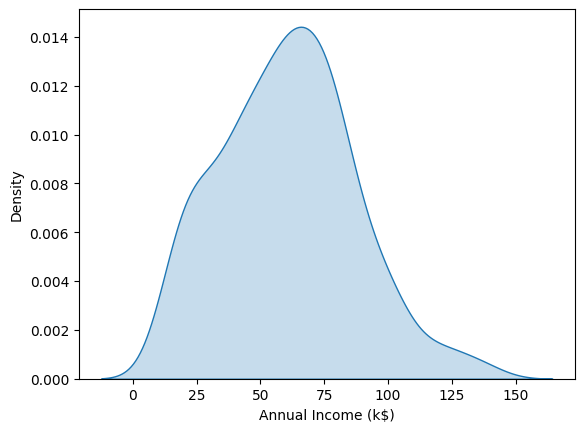

In [9]:
sb.kdeplot(df['Annual Income (k$)'], shade = True);

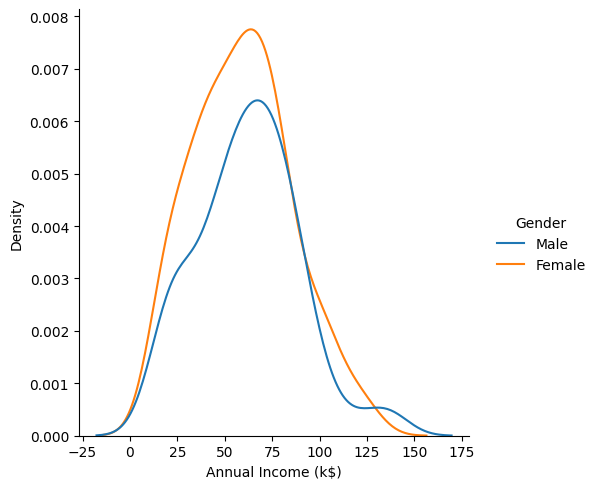

In [39]:
#sb.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']); 

sb.displot(df.reset_index(drop=True), x='Annual Income (k$)', kind="kde", hue='Gender', rug=False)

In [ ]:
cols = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in cols:
    plt.figure()
    sb.kdeplot(df[i],shade=True,hue=df['Gender']);   

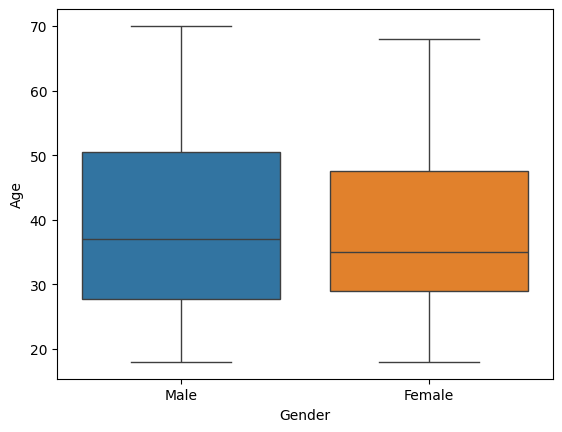

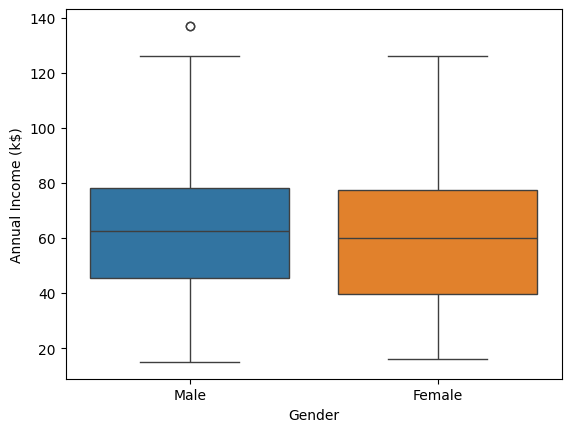

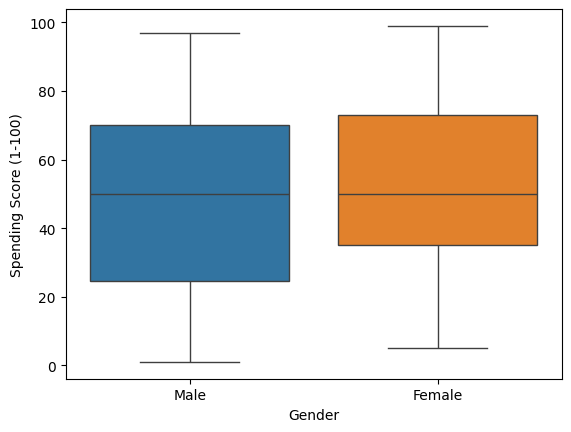

In [44]:
cols = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in cols:
    plt.figure()
    sb.boxplot(data=df, x='Gender',hue='Gender', y=df[i]);  

In [50]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate Analysis

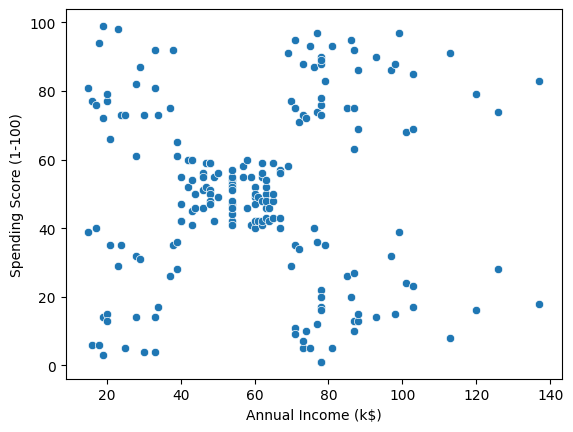

In [68]:
sb.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)');

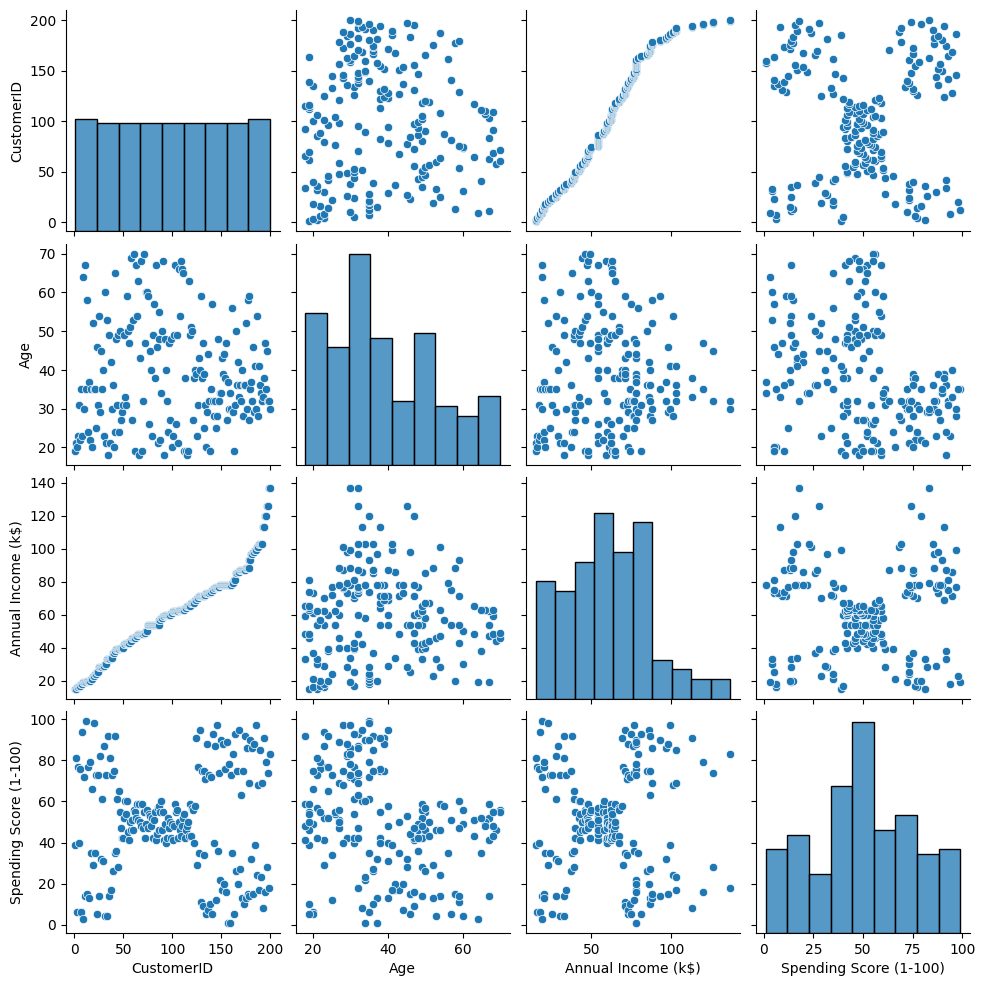

In [78]:
sb.pairplot(df);

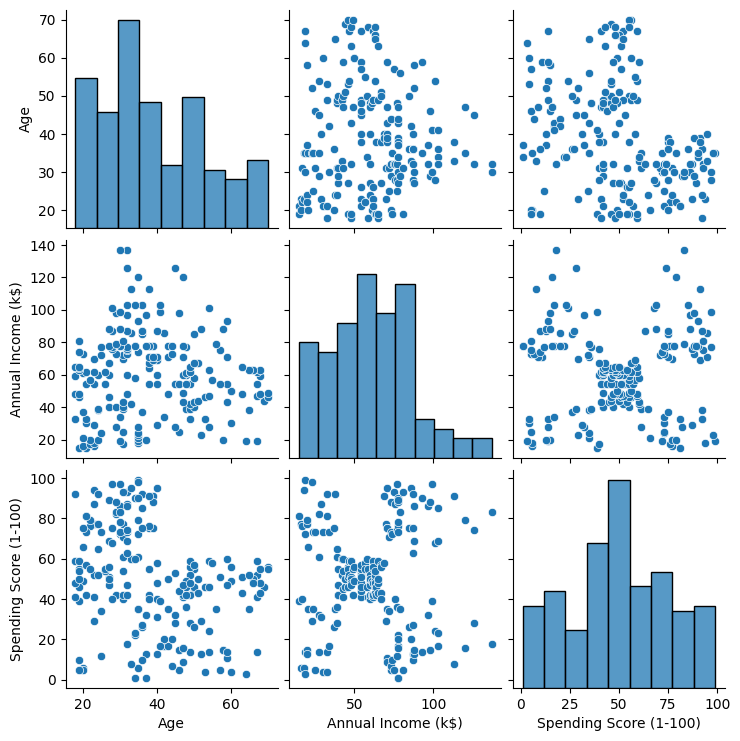

In [81]:
#df=df.drop('CustomerID',axis=1)
sb.pairplot(df);

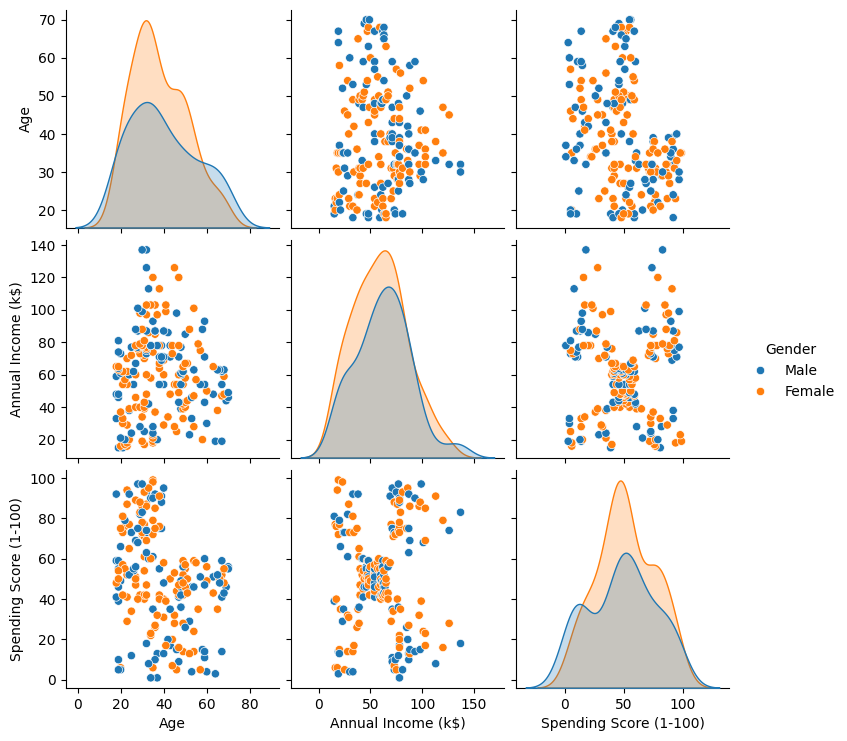

In [82]:
#df=df.drop('CustomerID',axis=1)
sb.pairplot(df,hue='Gender');

In [89]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [93]:
#The error message "could not convert string to float" occurs when using the corr() method in Python when the string 
#contains characters that cannot be interpreted as a float. This can happen if the string includes commas, spaces, or 
#special characters. For example, if your data source has the string "Male" in a column that you are expecting to 
#contain a number, you will receive this error.
#Add the numeric_only=True param to the corr() method.

df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


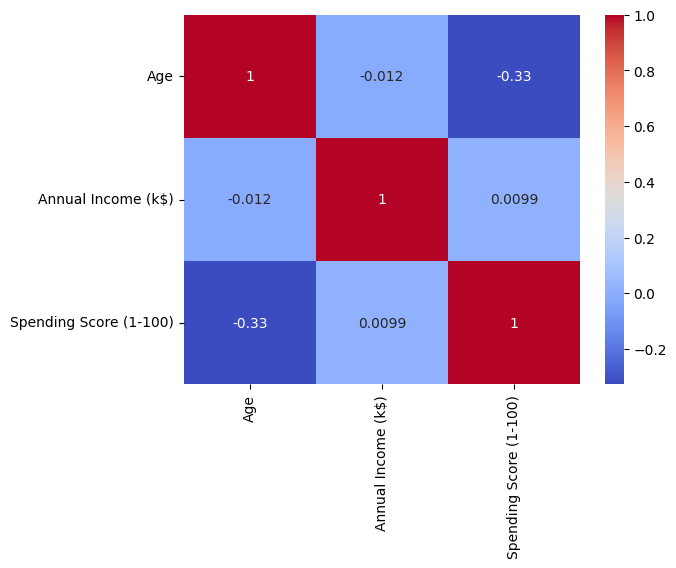

In [95]:
sb.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm');